## Creating a graph from text data
Looking at the neighbours of a selected word

### Loading the text data

In [1]:
import pandas as pd
import itertools

In [2]:
graph_data_path = '/home/benjamin/Documents/memetracker/Data/graph/'
pickle_data_path = '/home/benjamin/Documents/memetracker/Data/pickle/'
series_name = 'baron_noir'
pickle_file = pickle_data_path+series_name+'_texts'+'.pkl'
vocab_file = pickle_data_path+series_name+'_vocab_bow'+'.pkl'
tfidf_file = pickle_data_path+series_name+'_vocab_tfidf'+'.pkl'

In [3]:
text_data = pd.read_pickle(pickle_file)
vocab_data = pd.read_pickle(vocab_file)
tfidf_data = pd.read_pickle(tfidf_file)

In [4]:
# create the set of most used words
#nb_words = 200
#word_set = set(tfidf_data.words[0:nb_words])

### Date of publications

In [57]:
text_data.index = text_data['date']
del text_data['date']
text_data

,text,title,platform,hashtags,filtered_text
date,,,,,
2015-02-01 15:00:00,On se fiche royalement de savoir où est passée...,Mais où est donc passée l'extrême gauche ?,Comment,NaN,fiche royalement savoir passée extrême gauche ...
2015-05-01 14:51:00,"Le Baron Noir, plus grande BD politique de tou...",NaN,Twitter,NaN,Baron Noir plus grande politique tous temps
2015-05-01 14:55:29,"Le Baron Noir, suite : http://t.co/4fJXrZjnu7",NaN,Twitter,NaN,Baron Noir suite
2015-05-01 14:57:17,Excellent et teeeellement vrai ! RT@OLecointe:...,NaN,Twitter,NaN,Excellent teeeellement vrai @OLecointe Baron N...
2015-06-01 07:39:08,@Pward13 l'armure de mon Baron Noir a plus de ...,NaN,Twitter,NaN,@Pward13 Baron Noir plus classe
2015-06-01 18:35:37,"Situé à 2h de route de Sharm El Sheikh, Dahab ...",Mer rouge > Egypte > Dahab,Website,NaN,Situé route Sharm Sheikh Dahab saura charmer a...
2015-08-01 10:00:21,Peux tu nous en dire plus sur les étrier? Mont...,"Route • Re: L'arme furtive by ""Le Baron Noir""",Forum,NaN,Peux dire plus étrier Montage réglages peux pa...
2015-08-01 12:23:17,maertens a écrit:Peux tu nous en dire plus sur...,"Route • Re: L'arme furtive by ""Le Baron Noir""",Forum,NaN,maertens écrit Peux dire plus étrier Montage r...
2015-08-01 12:35:32,je confirme.\nStatistiques: Posté de rickyfirs...,"Route • Re: L'arme furtive by ""Le Baron Noir""",Forum,NaN,confirme Statistiques Posté rickyfirst Jeu Jan...


In [59]:
text_data['2015-05-01']

,text,title,platform,hashtags,filtered_text
date,,,,,
2015-05-01 14:51:00,"Le Baron Noir, plus grande BD politique de tou...",NaN,Twitter,NaN,Baron Noir plus grande politique tous temps
2015-05-01 14:55:29,"Le Baron Noir, suite : http://t.co/4fJXrZjnu7",NaN,Twitter,NaN,Baron Noir suite
2015-05-01 14:57:17,Excellent et teeeellement vrai ! RT@OLecointe:...,NaN,Twitter,NaN,Excellent teeeellement vrai @OLecointe Baron N...


In [69]:
text_data['2015-05']

,text,title,platform,hashtags,filtered_text
date,,,,,
2015-05-01 14:51:00,"Le Baron Noir, plus grande BD politique de tou...",NaN,Twitter,NaN,Baron Noir plus grande politique tous temps
2015-05-01 14:55:29,"Le Baron Noir, suite : http://t.co/4fJXrZjnu7",NaN,Twitter,NaN,Baron Noir suite
2015-05-01 14:57:17,Excellent et teeeellement vrai ! RT@OLecointe:...,NaN,Twitter,NaN,Excellent teeeellement vrai @OLecointe Baron N...
2015-05-02 06:14:46,"""Verser systématiquement le reliquat de droit ...","L'unédic savait qu'il y aurait 500 000 ""lésés ...",Website,NaN,Verser systématiquement reliquat droit plutôt ...
2015-05-03 07:28:00,Et au niveau des « services » - et des autorit...,"Contre les drones baladeurs, l’Etat veut sorti...",Comment,NaN,niveau services autorités bien peur reste vrai...
2015-05-03 09:04:36,Hop. Un peu d'histoire des sciences planquée d...,NaN,Twitter,NaN,Hop peu sciences planquée prochain Baron Noir ...
2015-05-03 18:48:19,13 février 2015\nC’est la québécoise Le Trou d...,Ma bière préférée de la dernière semaine : Le ...,Website,NaN,février 2015 québécoise Trou Diable produit po...
2015-05-03 19:06:52,Ma bière préférée de la dernière semaine : Le ...,NaN,Twitter,NaN,bière préférée dernière semaine Baron Noir Bar...
2015-05-13 00:00:00,Publié dans Satellifax du mercredi 13 mai 2015...,Canal+ / Kwaï : la série politique Baron Noir ...,Website,NaN,Publié Satellifax mercredi mai 2015 tournage s...


###  Selecting documents with particular keywords

In [5]:
# find the words that follow the keyword candidat_word
candidat_word = "baron"
selected_Keywords = set(candidat_word.split())
data_subset = []
neighbour_list = []
for text in text_data.filtered_text:
    wordlist = str(text).split()
    if len(set(wordlist)&selected_Keywords)>=(len(selected_Keywords)):
        data_subset.append(text)
        word_ind = wordlist.index(candidat_word)
        if (word_ind+1<len(wordlist)):
            neighbour_list.append(wordlist[word_ind+1])

In [6]:
from collections import Counter

In [7]:
N_uniquedic = Counter(neighbour_list)
N_words = {k:v for (k,v) in N_uniquedic.items() if v > 0}
Ndf = pd.DataFrame(list(N_words.items()), columns=['word','nb_occur'])
Ndf = Ndf.sort_values('nb_occur',ascending=False)
Ndf = Ndf.reset_index(drop=True)

In [8]:
Ndf

,word,nb_occur
0,noir,1915
1,Noir,47
2,manière,7
3,Lhoist,6
4,installe,5
5,gmail,5
6,local,4
7,socialiste,3
8,député,3
9,Kad,2


## Computing the hirarchical structure 

In [9]:
def find_neighbours(word,texts,direction='forward'):
    # find the words that follow (direction='forward') or precede (direction='backward')
    # the keyword 'word' in the texts 'texts'
    # return 
    # * the list of keywords with their occurence in a pandas dataframe
    # * the list of texts where the word has been found
    # Example:
    #         word_list,texts_list = find_neighbours(word,texts,direction='forward')
    neighbour_list = []
    texts_subset = []
    #print(word)
    for text in texts:
        text = text.lower()
        wordlist = str(text).split()
        if len(set(wordlist)&set([word]))>0:
            word_ind = wordlist.index(word)
            texts_subset.append(text)
            if direction=='forward':
                if (word_ind+1<len(wordlist)):
                    neighbour_list.append(wordlist[word_ind+1])
            elif direction=='backward':
                if (word_ind-1>0):
                    neighbour_list.append(wordlist[word_ind-1])
            else :
                raise NameError('Unknown direction')
    N_uniquedic = Counter(neighbour_list)
    # optionally: filter te dic for removing the lowest values
    N_words = {k:v for (k,v) in N_uniquedic.items() if v > 0}
    Ndf = pd.DataFrame(list(N_words.items()), columns=['word','nb_occur'])
    Ndf = Ndf.sort_values('nb_occur',ascending=False)
    Ndf = Ndf.reset_index(drop=True)
    return Ndf,texts_subset

In [10]:
def top_neighbours(word,texts,top_n=10):
    Ndf,texts_subset = find_neighbours(word,texts,direction='forward')
    return Ndf.head(top_n)

In [11]:
def graph_neighbours(G,parent,word,neighbour_data,layer_id):
    parent_node = word+parent+str(layer_id-1)
    total_occur = neighbour_data.nb_occur.sum()
    for idx,node_row in neighbour_data.iterrows():
        G.add_node(node_row.word+word+str(layer_id),name=node_row.word, occur=node_row.nb_occur)
        G.add_edge(parent_node,node_row.word+word+str(layer_id),weight=node_row.nb_occur*1.0/total_occur)
    return parent_node

In [12]:
def expand_neighbours(parent,word,texts,layer_id,layer_max=4,top_n=10):
    if layer_id >= layer_max:
        return []
    neighbour_data = top_neighbours(word,texts,top_n)
    graph_neighbours(G,parent,word,neighbour_data,layer_id)
    layer_id+=1
    parent_node = word
    neighbour_list = list(neighbour_data.word)
    for nnode in neighbour_list:
        expand_neighbours(parent_node,nnode,texts,layer_id,layer_max,top_n)

### Creating the graph

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

In [37]:
G = nx.DiGraph()
# root word
candidat_word = "via"
layer_id=0
parent = ''
candidat_id = candidat_word+parent+str(layer_id)
# compute the number of occurences of the word:
word_list,texts_list = find_neighbours(candidat_word,text_data.filtered_text,direction='forward')
nb_occur = len(texts_list)
G.add_node(candidat_id,name=candidat_word, occur=nb_occur)
# find children nodes
expand_neighbours(parent,candidat_word,texts=text_data.filtered_text,layer_id=1,layer_max=3,top_n=20)
#parent,level1 = expand_neighbours(parent,[candidat_word],text_data.filtered_text,top_n=10,layer_id=1)
#parent,level2 = expand_neighbours(parent,level1,text_data.filtered_text,top_n=2,layer_id=2)
#level3 = expand_neighbours(level2,text_data.filtered_text,top_n=10)
#level4 = expand_neighbours(level3,text_data.filtered_text,top_n=10)

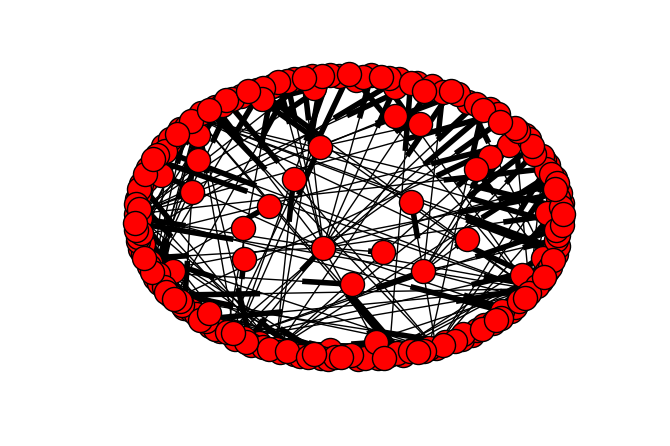

In [38]:
nx.draw_spring(G,)
plt.show()

In [39]:
G.size()

205

### Thresholding the edges

In [40]:
# Extracting the edge information
#sum_weight = 0
#n_edges = 0
#for u,v,a in G.edges(data=True):
#    sum_weight+=a['weight']
#    n_edges+=1
#average_weight = sum_weight*1.0/n_edges

In [41]:
# Node properties: degree and centrality
degreeDic = G.degree(weight='weight')
nx.set_node_attributes(G,'degree',degreeDic)
bcDic = nx.betweenness_centrality(G)
nx.set_node_attributes(G,'bCentrality',bcDic)

In [42]:
# Write the graph to a json file
from networkx.readwrite import json_graph
datag = json_graph.tree_data(G,root=candidat_id)
import json
s = json.dumps(datag)
#datag['links'] = [
#        {
#            'source': datag['nodes'][link['source']]['id'],
#            'target': datag['nodes'][link['target']]['id']
#        }
#        for link in datag['links']]
s = json.dumps(datag)
with open("viz/treegraph.json", "w") as f:
    f.write(s)

In [ ]:
s

In [ ]:
G.edges(data='weight')

In [ ]:
clusterDic